In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_styles('darkgrid')
# rcParams (run time configuration parameters)
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']="#E6F0FF"

# Importing data Set

In [14]:
# import pandas as pd
file_path= pd.read_csv('D:\\Data analyst projects\\World Happiness report\\world-happiness-report-2021.csv')
data =file_path

In [89]:
data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [27]:
# Select specific columns for analysis
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita',
                'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']



In [28]:
data = data[data_columns].copy()

# Now Rename the columns using rename function and we pass new names using dictionary

In [90]:
happy_df = data.rename(columns={
    'Country name': 'country_name',
    'Regional indicator': 'regional_indicator',
    'Ladder score': 'ladder_score',
    'Logged GDP per capita': 'Logged_GDP_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption'
})

In [91]:
happy_df.head()

,country_name,regional_indicator,ladder_score,Logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [92]:
# checking null value from the above columns
null_values = happy_df.isnull().sum()
print(null_values)

country_name                    0
regional_indicator              0
ladder_score                    0
Logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64


# Plot b/w Ladder(Happiness) Score and GDP (visualization)

Text(0, 0.5, 'GDP per capita')

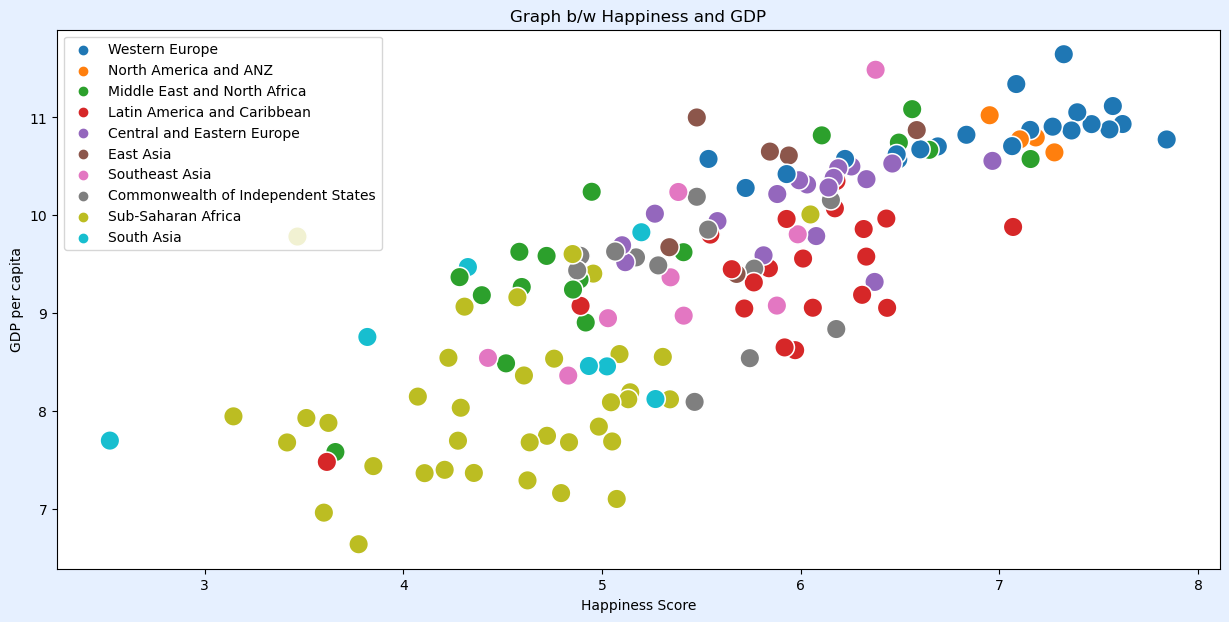

In [62]:
# import matplotlib.pyplot as plt
# import seaborn as sns
plt.rcParams['figure.figsize']=(15,7)
plt.rcParams['figure.facecolor']="#E6F0FF"
plt.title('Graph b/w Happiness and GDP')
# small "s" is bubble size in below line of code
sns.scatterplot(x=happy_df.ladder_score, y=happy_df.Logged_GDP_per_capita, hue=happy_df.regional_indicator, s=200);

# loc is giving location of region indicators where to locate
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')


# GDP by region (we sum the values as below)

In [53]:
gdp_region=happy_df.groupby('regional_indicator')['Logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

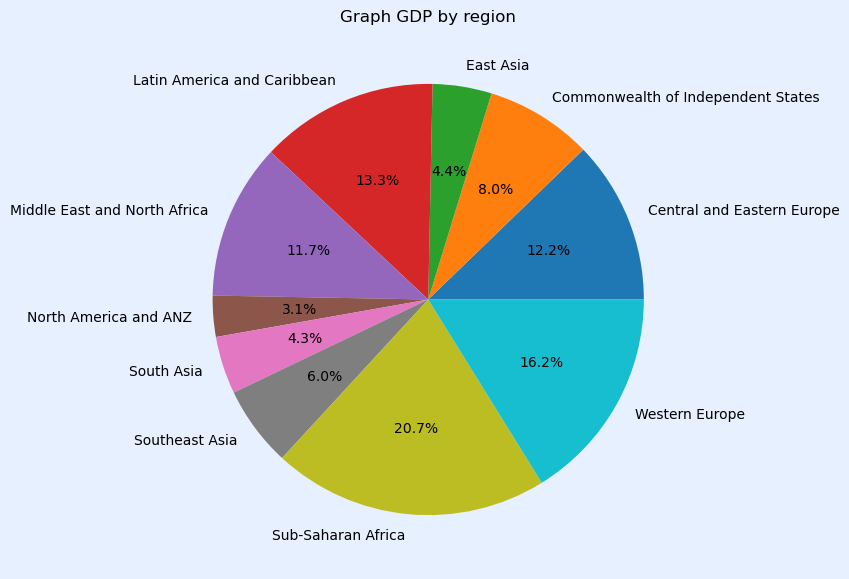

In [93]:
# we will show it in % format by defining its format in code
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('Graph GDP by region')
plt.rcParams['figure.facecolor']="#E6F0FF"
plt.ylabel('')

# finding total number of countries in each region

In [64]:
total_country_per_region=happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country_per_region)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


# Correlation map that show relationship b/w each of the variable present in a data set

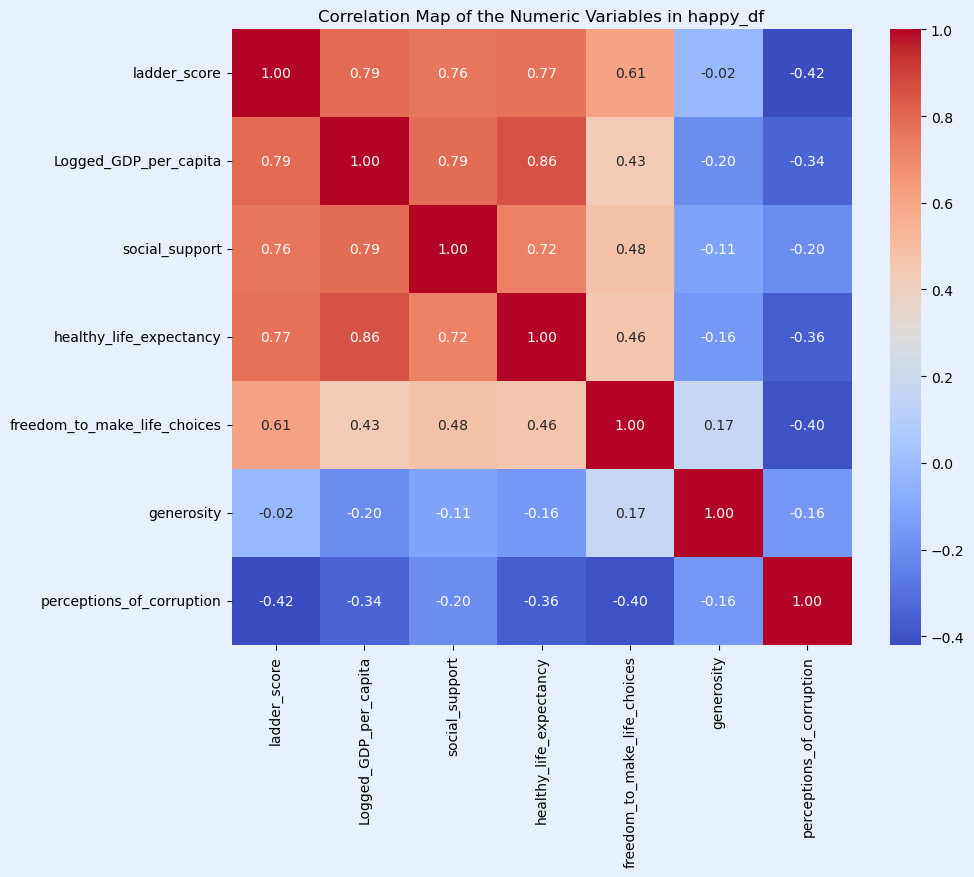

In [96]:

# Select only the numeric columns for correlation
numeric_cols = happy_df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map of the Numeric Variables in happy_df')
plt.show()


# Explanation of code
# Import Necessary Libraries:
# The code starts by importing the required libraries: pandas, seaborn, and matplotlib.pyplot.
# These libraries are necessary for handling data and creating the correlation map visualization.

# Select Numeric Columns:
# The line numeric_cols = happy_df.select_dtypes(include='number') is used to filter the columnsin the happy_df
# DataFrame and select only those columns that contain numeric data. The select_dtypes function with include='number'
# ensures that only columns with numerical data types (integers or floats) are included in the numeric_cols DataFrame.

# Calculate Correlation Matrix:
# Once the numeric columns are selected, the code proceeds to calculate the correlation matrix using numeric_cols.corr().
# This computes the pairwise correlations between all the numeric columns in the DataFrame.

# Create a Correlation Heatmap:
# The next section uses Seaborn and Matplotlib to create a heatmap visualization of the correlation matrix.
# It sets up the heatmap's size, appearance, and annotations. 
# sns.heatmap() creates the heatmap using the correlation matrix calculated, setting the color map to 'coolwarm' 
# and formatting the annotations to show two decimal places (fmt=".2f").
#  Finally, plt.show() displays the correlation map as a visualization.
 

# Bar plot for determining corruption in different regions

In [97]:
corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

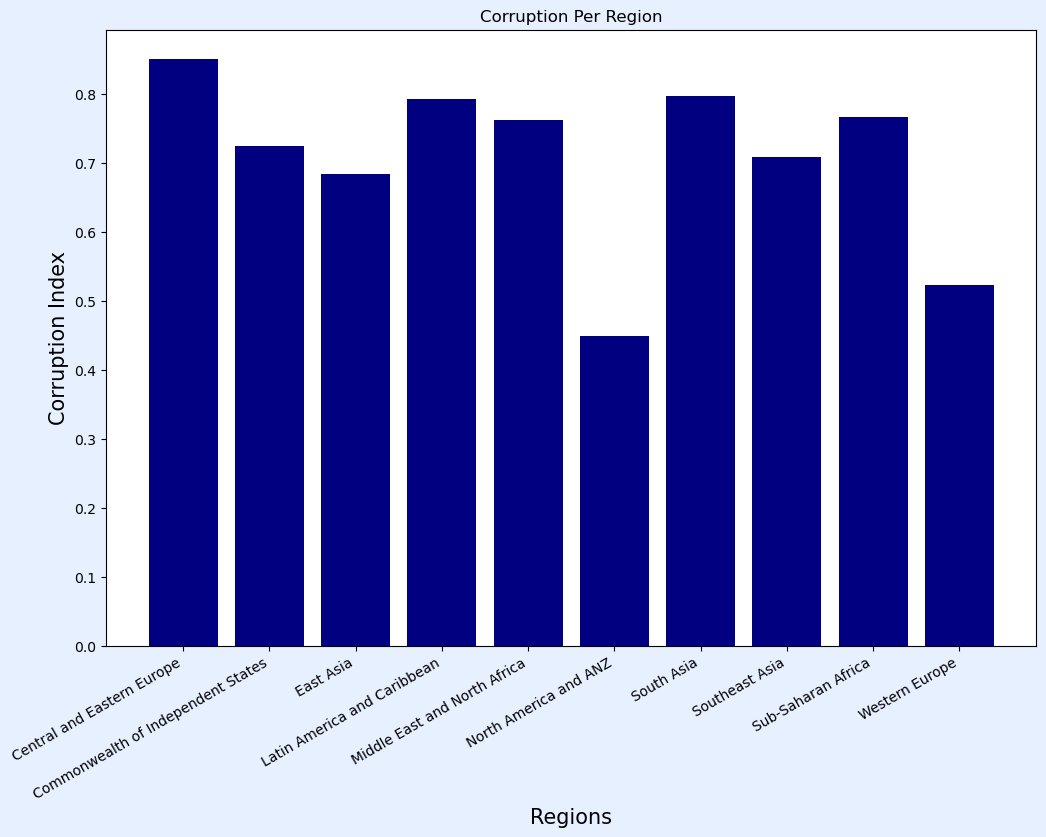

In [106]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Corruption Per Region')
plt.xlabel('Regions', fontsize='15')
plt.ylabel('Corruption Index', fontsize='15')
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption,facecolor='navy')

# Top 10 Happiest country Life Expentency & Bottom 10 Least Happiest Life Expentency by Bar plot graph

In [107]:
top_10_countries=happy_df.head(10)
bottom_10_countries=happy_df.tail(10)

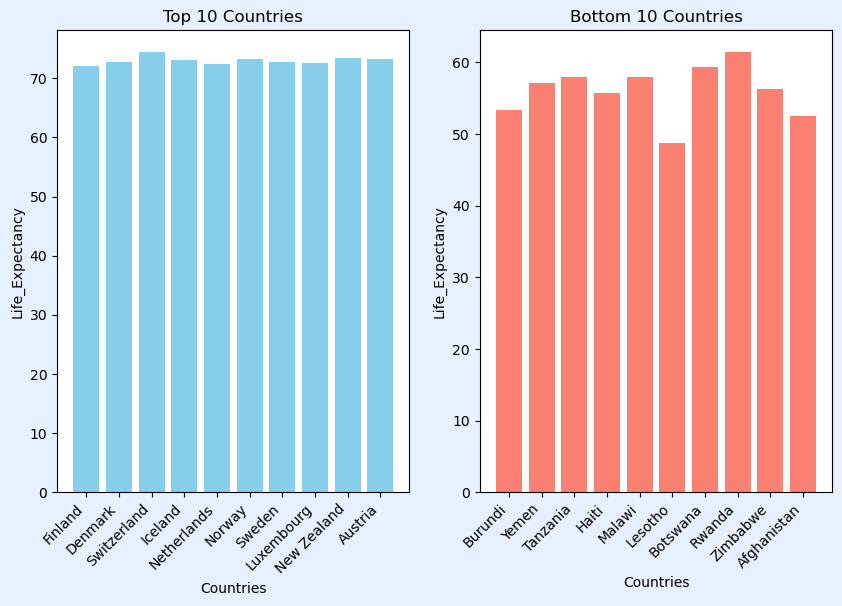

In [121]:
plt.figure(figsize=(10, 6))

# Plot for Top 10 countries
plt.subplot(1, 2, 1)  # Subplot for the top 10 countries
plt.bar(top_10_countries['country_name'], top_10_countries['healthy_life_expectancy'], color='skyblue')
plt.title('Top 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Life_Expectancy')
plt.xticks(rotation=45, ha='right')

# Plot for Bottom 10 countries
plt.subplot(1, 2, 2)  # Subplot for the bottom 10 countries
plt.bar(bottom_10_countries['country_name'], bottom_10_countries['healthy_life_expectancy'], color='salmon')
plt.title('Bottom 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Life_Expectancy')
plt.xticks(rotation=45, ha='right')


plt.show()

# Graph b/w freedom_to_make_life_choices and Ladder(happiness) Score

Text(0, 0.5, 'Ladder Score')

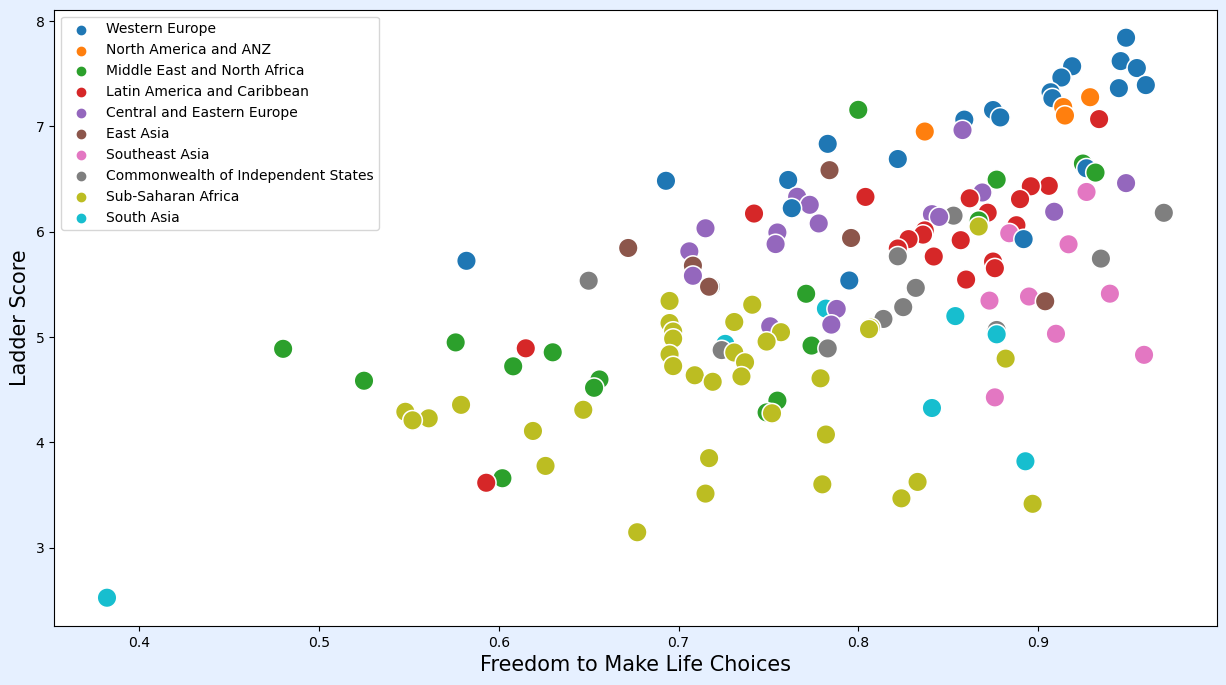

In [141]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.scatterplot(x=happy_df['freedom_to_make_life_choices'], y=happy_df['ladder_score'], hue=happy_df['regional_indicator'], s=200)
plt.legend(loc='upper left')
plt.xlabel('Freedom to Make Life Choices',fontsize='15')
plt.ylabel('Ladder Score',fontsize=15)


# To see top most corrupt countries

<BarContainer object of 10 artists>

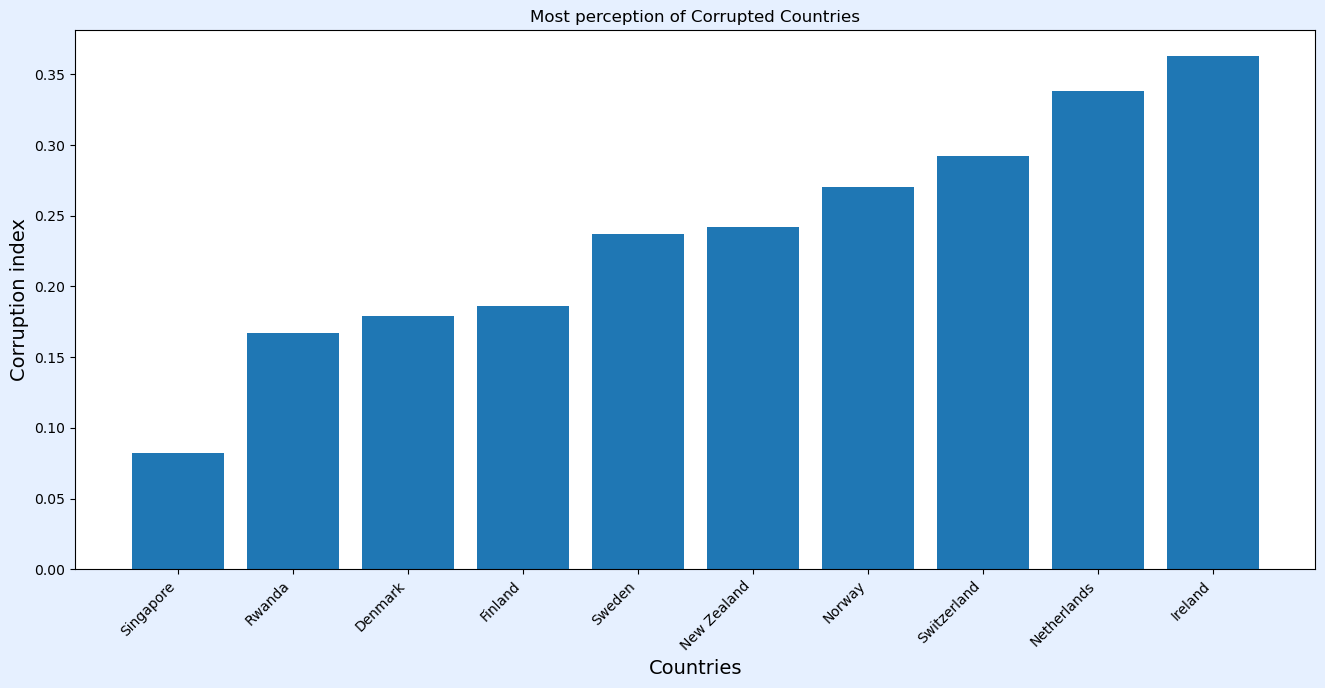

In [143]:
corruption_countries=happy_df.sort_values(by='perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize']=(16,7)
plt.title('Countries with the Most perception of Corruption ')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Corruption index', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.bar(corruption_countries['country_name'],corruption_countries['perceptions_of_corruption'] )

# How corruption varies happiness score

Text(0, 0.5, 'Corruption')

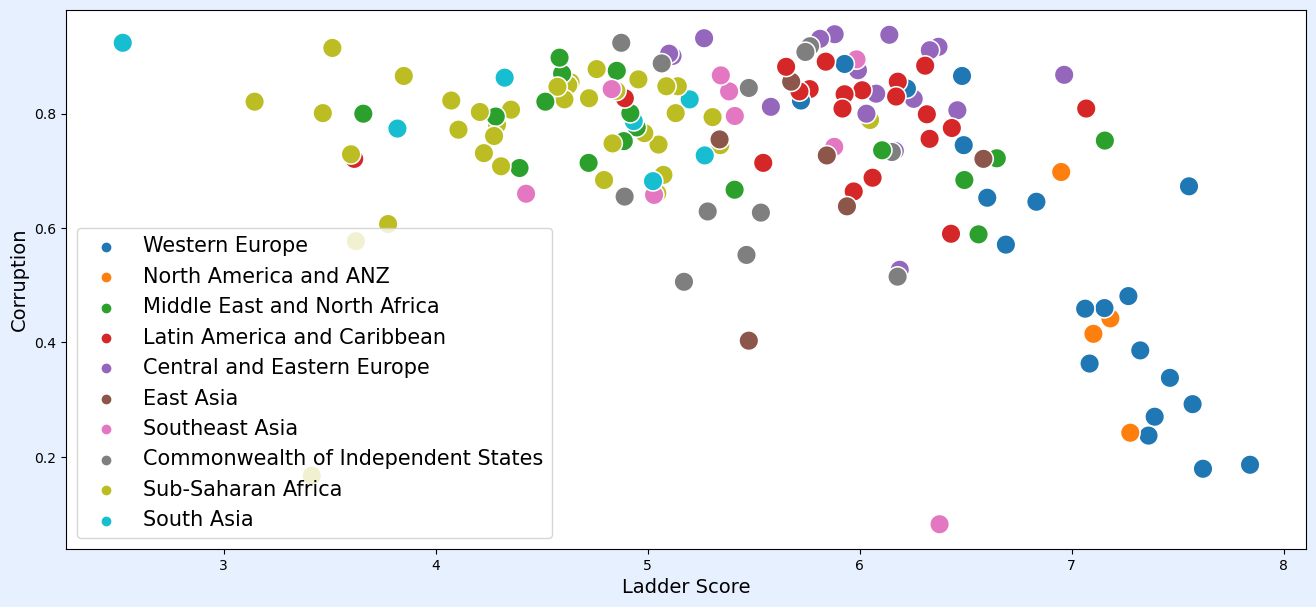

In [145]:
plt.rcParams['figure.figsize']=(16,7)
sns.scatterplot(x=happy_df['ladder_score'], y=happy_df['perceptions_of_corruption'], hue=happy_df['regional_indicator'], s=200)
plt.legend(loc='lower left',fontsize='15')
plt.xlabel('Ladder Score',fontsize=14)
plt.ylabel('Corruption', fontsize=14)
